In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#bibliotecas de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc


import warnings
warnings.filterwarnings('ignore')

In [ ]:
RegularSeasDetai=pd.read_csv('https://raw.githubusercontent.com/andresramirez31/datosModelos/main/RegularSeasonDetailedResults.csv')
Teams=pd.read_csv('https://raw.githubusercontent.com/andresramirez31/datosModelos/main/Teams.csv')



In [ ]:
for i in range(int(len(RegularSeasDetai) * 0.05)):
    x = np.random.randint(len(RegularSeasDetai))
    RegularSeasDetai.loc[x, "Lftm"] = np.nan
    RegularSeasDetai.loc[x, "Ldr"] = np.nan
    RegularSeasDetai.loc[x, "Lfga3"] = np.nan

In [ ]:
RegularSeasDetai["Numot"] = pd.Categorical(RegularSeasDetai.Numot)
RegularSeasDetai["Daynum"] = pd.Categorical(RegularSeasDetai.Daynum)
RegularSeasDetai["Wloc"] = pd.Categorical(RegularSeasDetai.Wloc)

In [ ]:
k = RegularSeasDetai.isna().sum()
k

Season       0
Daynum       0
Wteam        0
Wscore       0
Lteam        0
Lscore       0
Wloc         0
Numot        0
Wfgm         0
Wfga         0
Wfgm3        0
Wfga3        0
Wftm         0
Wfta         0
Wor          0
Wdr          0
Wast         0
Wto          0
Wstl         0
Wblk         0
Wpf          0
Lfgm         0
Lfga         0
Lfgm3        0
Lfga3     3733
Lftm      3733
Lfta         0
Lor          0
Ldr       3733
Last         0
Lto          0
Lstl         0
Lblk         0
Lpf          0
dtype: int64

In [ ]:
RegularSeasDetai.dtypes

Season       int64
Daynum    category
Wteam        int64
Wscore       int64
Lteam        int64
Lscore       int64
Wloc      category
Numot     category
Wfgm         int64
Wfga         int64
Wfgm3        int64
Wfga3        int64
Wftm         int64
Wfta         int64
Wor          int64
Wdr          int64
Wast         int64
Wto          int64
Wstl         int64
Wblk         int64
Wpf          int64
Lfgm         int64
Lfga         int64
Lfgm3        int64
Lfga3      float64
Lftm       float64
Lfta         int64
Lor          int64
Ldr        float64
Last         int64
Lto          int64
Lstl         int64
Lblk         int64
Lpf          int64
dtype: object

In [ ]:
#Limpieza de datos
RegularSeasDetai = RegularSeasDetai.drop(["Daynum", "Numot"], axis=1)
RegularSeasDetai

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Wfgm,Wfga,Wfgm3,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,10,1104,68,1328,62,N,27,58,3,...,10.0,16.0,22,10,22.0,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,26,62,8,...,24.0,9.0,20,20,25.0,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,24,58,8,...,26.0,14.0,23,31,22.0,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,18,38,3,...,22.0,8.0,15,17,20.0,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,30,61,6,...,16.0,17.0,27,21,15.0,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76631,2017,132,1276,71,1458,56,N,27,48,10,...,15.0,6.0,8,14,18.0,10,15,4,3,13
76632,2017,132,1343,71,1463,59,N,25,52,11,...,20.0,13.0,19,14,20.0,12,7,4,5,13
76633,2017,132,1348,70,1433,63,N,24,54,8,...,14.0,17.0,22,23,24.0,8,5,4,1,16
76634,2017,132,1374,71,1153,56,N,26,52,10,...,24.0,14.0,18,17,22.0,7,7,7,1,13


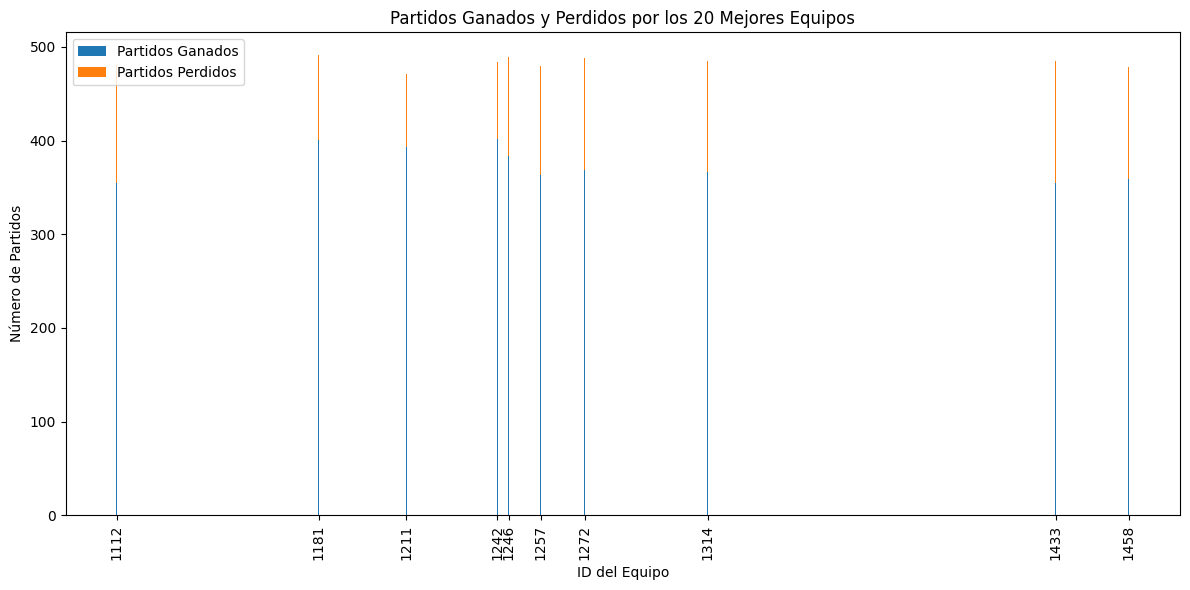

In [ ]:


matches_won = RegularSeasDetai['Wteam'].value_counts().reset_index()
matches_won.columns = ['ID del Equipo', 'Partidos Ganados']

matches_lost = RegularSeasDetai['Lteam'].value_counts().reset_index()
matches_lost.columns = ['ID del Equipo', 'Partidos Perdidos']


team_stats = matches_won.merge(matches_lost, on='ID del Equipo', how='outer').fillna(0)


top_10_teams = team_stats.sort_values(by='Partidos Ganados', ascending=False).head(10)


plt.figure(figsize=(12, 6))
width = 0.35
x = top_10_teams['ID del Equipo']
bar1 = plt.bar(x, top_10_teams['Partidos Ganados'], width, label='Partidos Ganados')
bar2 = plt.bar(x, top_10_teams['Partidos Perdidos'], width, label='Partidos Perdidos', bottom=top_10_teams['Partidos Ganados'])

plt.xlabel('ID del Equipo')
plt.ylabel('Número de Partidos')
plt.title('Partidos Ganados y Perdidos por los 20 Mejores Equipos')
plt.xticks(x, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


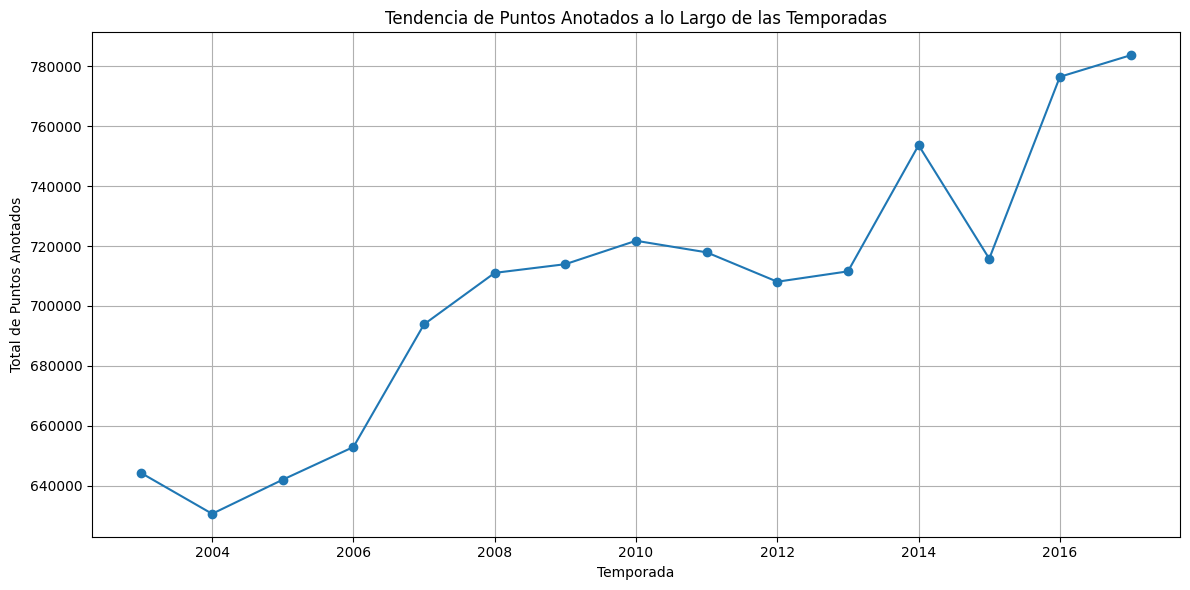

In [ ]:
season_scores = RegularSeasDetai.groupby('Season')[['Wscore', 'Lscore']].sum()

# Crea una nueva columna que contiene el total de puntos anotados en cada temporada.
season_scores['total_puntos'] = season_scores['Wscore'] + season_scores['Lscore']

# Crea un gráfico de líneas para visualizar la tendencia de los puntos totales a lo largo de las temporadas.
plt.figure(figsize=(12, 6))
plt.plot(season_scores.index, season_scores['total_puntos'], marker='o', linestyle='-')
plt.xlabel('Temporada')
plt.ylabel('Total de Puntos Anotados')
plt.title('Tendencia de Puntos Anotados a lo Largo de las Temporadas')
plt.grid(True)

plt.tight_layout()
plt.show()



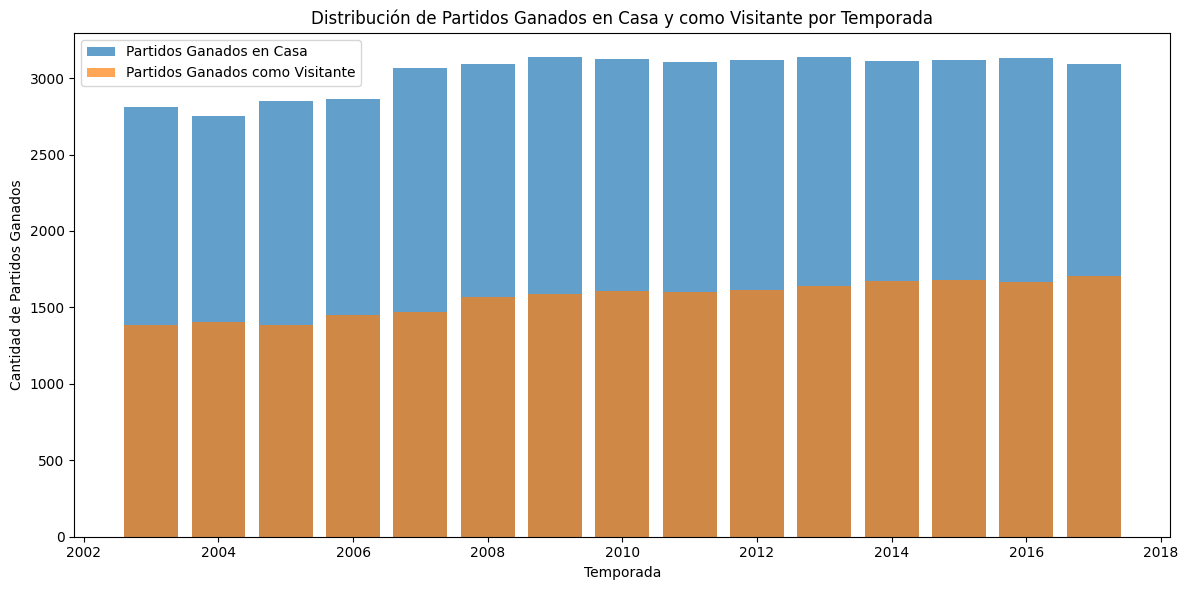

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


home_wins = RegularSeasDetai[(RegularSeasDetai['Wloc'] == 'H')]
away_wins = RegularSeasDetai[(RegularSeasDetai['Wloc'] == 'A')]


home_wins_by_season = home_wins.groupby('Season')['Wloc'].count()
away_wins_by_season = away_wins.groupby('Season')['Wloc'].count()


plt.figure(figsize=(12, 6))
plt.bar(home_wins_by_season.index, home_wins_by_season, label='Partidos Ganados en Casa', alpha=0.7)
plt.bar(away_wins_by_season.index, away_wins_by_season, label='Partidos Ganados como Visitante', alpha=0.7)
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Partidos Ganados')
plt.title('Distribución de Partidos Ganados en Casa y como Visitante por Temporada')
plt.legend()

plt.tight_layout()
plt.show()


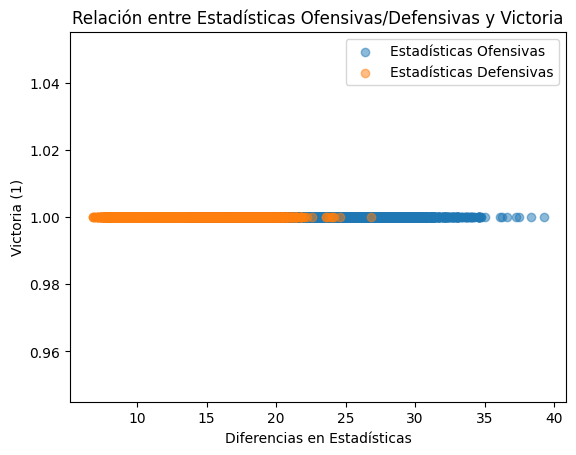

In [ ]:




offensive_stats = ['Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor', 'Wast']
defensive_stats = ['Wdr', 'Wto', 'Wstl', 'Wblk', 'Wpf']

RegularSeasDetai['Diff_Offensive'] = RegularSeasDetai[offensive_stats].mean(axis=1)
RegularSeasDetai['Diff_Defensive'] = RegularSeasDetai[defensive_stats].mean(axis=1)


plt.scatter(RegularSeasDetai['Diff_Offensive'], pd.Series(1, index=RegularSeasDetai.index), label='Estadísticas Ofensivas', alpha=0.5)


plt.scatter(RegularSeasDetai['Diff_Defensive'], pd.Series(1, index=RegularSeasDetai.index), label='Estadísticas Defensivas', alpha=0.5)


plt.title('Relación entre Estadísticas Ofensivas/Defensivas y Victoria')
plt.xlabel('Diferencias en Estadísticas')
plt.ylabel('Victoria (1)')
plt.legend()


plt.show()



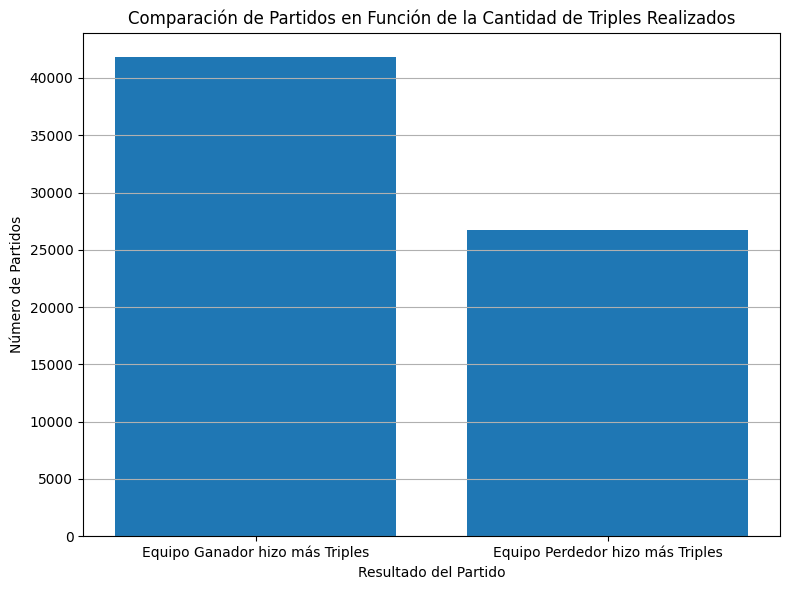

In [ ]:






winning_team_more_threes = RegularSeasDetai[RegularSeasDetai['Wfgm3'] > RegularSeasDetai['Lfgm3']]


losing_team_more_threes = RegularSeasDetai[RegularSeasDetai['Wfgm3'] < RegularSeasDetai['Lfgm3']]


winning_team_more_threes_count = len(winning_team_more_threes)
losing_team_more_threes_count = len(losing_team_more_threes)

labels = ['Equipo Ganador hizo más Triples', 'Equipo Perdedor hizo más Triples']

data_to_plot = [winning_team_more_threes_count, losing_team_more_threes_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, data_to_plot)
plt.xlabel('Resultado del Partido')
plt.ylabel('Número de Partidos')
plt.title('Comparación de Partidos en Función de la Cantidad de Triples Realizados')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


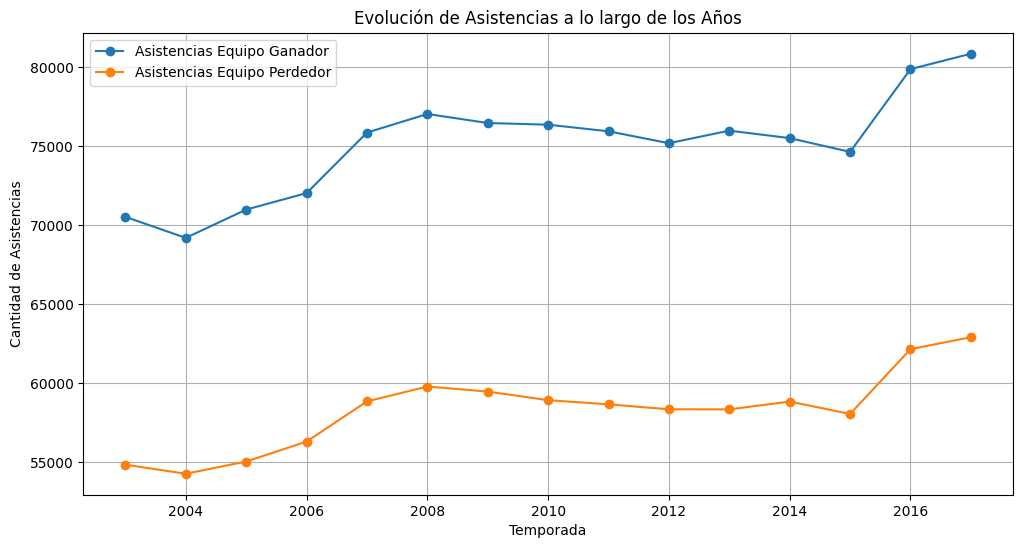

In [ ]:

asistencias_por_temporada = RegularSeasDetai.groupby('Season')[['Wast', 'Last']].sum()

plt.figure(figsize=(12, 6))
plt.plot(asistencias_por_temporada.index, asistencias_por_temporada['Wast'], label='Asistencias Equipo Ganador', marker='o', linestyle='-')
plt.plot(asistencias_por_temporada.index, asistencias_por_temporada['Last'], label='Asistencias Equipo Perdedor', marker='o', linestyle='-')

plt.xlabel('Temporada')
plt.ylabel('Cantidad de Asistencias')
plt.title('Evolución de Asistencias a lo largo de los Años')
plt.legend()
plt.grid()

plt.show()


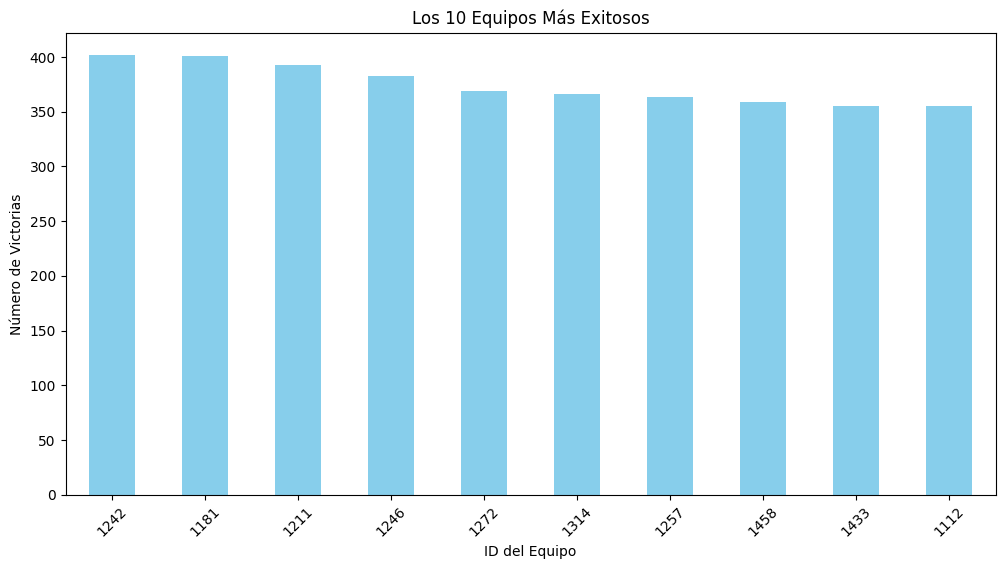

In [ ]:


equipo_ganador = RegularSeasDetai['Wteam']
victorias_por_equipo = equipo_ganador.value_counts()

victorias_por_equipo = victorias_por_equipo.sort_values(ascending=False)

top_n = 10
equipos_exitosos = victorias_por_equipo[:top_n]

plt.figure(figsize=(12, 6))
equipos_exitosos.plot(kind='bar', color='skyblue')
plt.title(f"Los {top_n} Equipos Más Exitosos")
plt.xlabel("ID del Equipo")
plt.ylabel("Número de Victorias")
plt.xticks(rotation=45)

plt.show()


<Figure size 1000x600 with 0 Axes>

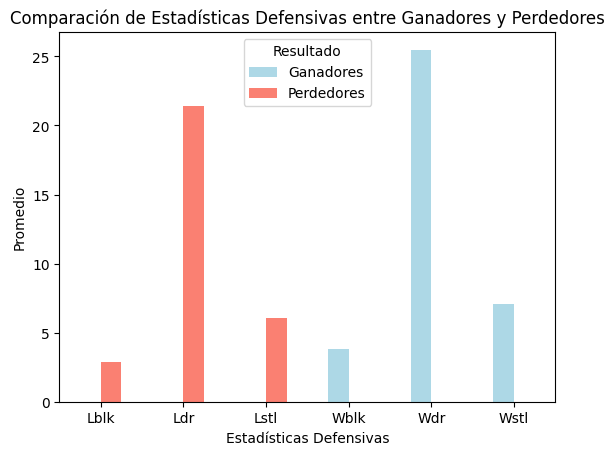

In [ ]:






estadisticas_ganadores = RegularSeasDetai[['Wdr', 'Wstl', 'Wblk']].mean()

estadisticas_perdedores = RegularSeasDetai[['Ldr', 'Lstl', 'Lblk']].mean()

estadisticas = pd.DataFrame({'Ganadores': estadisticas_ganadores, 'Perdedores': estadisticas_perdedores})

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
estadisticas.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title("Comparación de Estadísticas Defensivas entre Ganadores y Perdedores")
plt.xlabel("Estadísticas Defensivas")
plt.ylabel("Promedio")
plt.xticks(rotation=0)
plt.legend(title="Resultado")
plt.show()





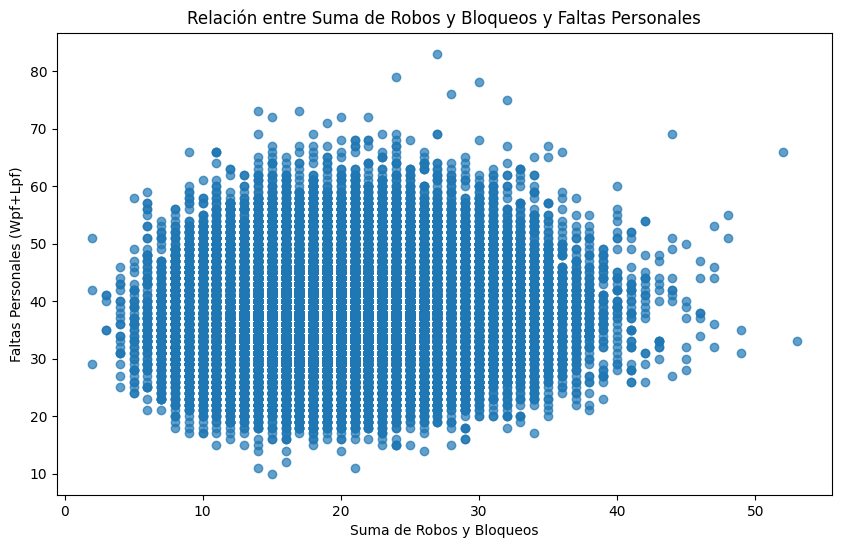

In [ ]:

RegularSeasDetai['robos_mas_bloqueos'] = RegularSeasDetai['Wstl'] + RegularSeasDetai['Wblk']+RegularSeasDetai["Lstl"]+RegularSeasDetai["Lblk"]
RegularSeasDetai['faltas_personales'] = RegularSeasDetai['Wpf'] + RegularSeasDetai['Lpf']
# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(RegularSeasDetai['robos_mas_bloqueos'],RegularSeasDetai['faltas_personales'], cmap='viridis', alpha=0.7)
plt.xlabel("Suma de Robos y Bloqueos")
plt.ylabel("Faltas Personales (Wpf+Lpf)")
plt.title("Relación entre Suma de Robos y Bloqueos y Faltas Personales")

plt.show()

